In [1]:
# Predict the Category of the Customer - Amazon Machine Learning Hiring Challenge 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the train and test data

In [2]:
customer_train=pd.read_csv(r"C:/Users/JaisoN/Desktop/Amazon/train.csv")
customer_test=pd.read_csv(r"C:/Users/JaisoN/Desktop/Amazon/test.csv")

In [4]:
# Lets see how the data looks like !!

In [5]:
print(customer_train.shape,customer_test.shape)

(10738, 12) (7160, 11)


In [6]:
customer_train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [7]:
customer_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [8]:
# ok, now lets check the percentage of null values in the data set

In [186]:
percent_missing = customer_train.isnull().sum() * 100 / len(customer_train)
print(percent_missing)

customer_id                         0.000000
customer_visit_score                0.000000
customer_product_search_score       0.391134
customer_ctr_score                  0.000000
customer_stay_score                 0.344571
customer_frequency_score            0.000000
customer_product_variation_score    0.428385
customer_order_score                0.614640
customer_affinity_score             0.000000
customer_active_segment             0.214193
X1                                  0.344571
customer_category                   0.000000
dtype: float64


In [187]:
percent_missing = customer_test.isnull().sum() * 100 / len(customer_test)
print(percent_missing)

customer_id                         0.000000
customer_visit_score                0.000000
customer_product_search_score       0.405028
customer_ctr_score                  0.000000
customer_stay_score                 0.223464
customer_frequency_score            0.000000
customer_product_variation_score    0.600559
customer_order_score                0.572626
customer_affinity_score             0.000000
customer_active_segment             0.167598
X1                                  0.349162
dtype: float64


In [188]:
# we have sone null values to take care of, I will do it later

# Let's check the outlires

In [7]:
import seaborn as sns

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


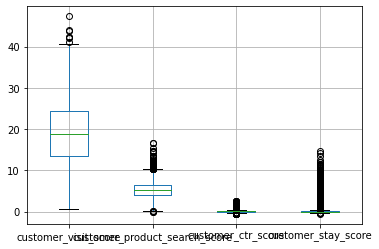

In [190]:
dt=customer_train[['customer_visit_score','customer_product_search_score','customer_ctr_score','customer_stay_score']]
dt.boxplot()

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


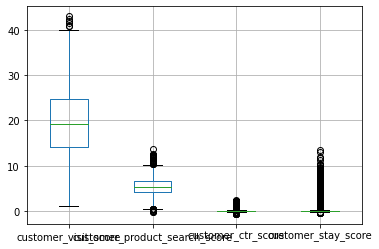

In [191]:
dt=customer_test[['customer_visit_score','customer_product_search_score','customer_ctr_score','customer_stay_score']]
dt.boxplot()

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


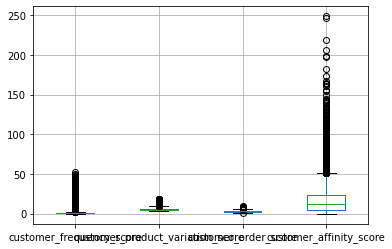

In [192]:
dt=customer_train[['customer_frequency_score','customer_product_variation_score','customer_order_score','customer_affinity_score','customer_active_segment']]
dt.boxplot()

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


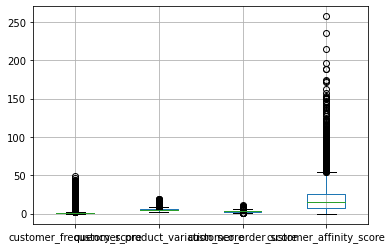

In [193]:
dt=customer_test[['customer_frequency_score','customer_product_variation_score','customer_order_score','customer_affinity_score','customer_active_segment']]
dt.boxplot()

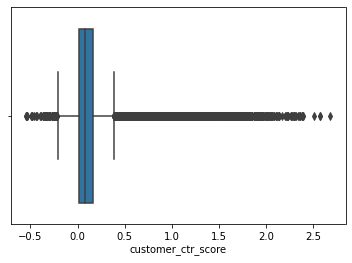

In [194]:
sns.boxplot(customer_train['customer_ctr_score'])

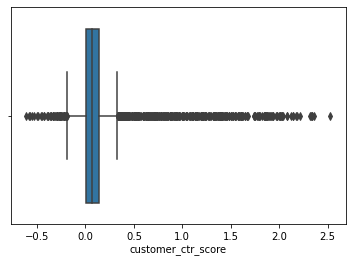

In [195]:
sns.boxplot(customer_test['customer_ctr_score'])

In [101]:
def outlire_remove(data,colums):
    for col in colums:
        min_thresold, max_thresold = data[col].quantile([0.001, 0.999])
        min_thresold, max_thresold

        #retail_train = retail_train[(retail_train.InvoiceNo<22000) & (retail_train.InvoiceNo>200)]
        data = data[(data[col]<max_thresold) & (data[col]>min_thresold)]

    return data

In [102]:
colums=['']
customer_train=outlire_remove(customer_train,colums)

In [17]:
# look like outlires distributionis same in both train and test data, hence I am not removing any Outlires

In [3]:
customer_train['customer_category'].value_counts()

0    9443
1    1295
Name: customer_category, dtype: int64

In [19]:
# check the skewness of the data

In [196]:
customer_train.skew()

customer_visit_score                0.101448
customer_product_search_score       0.289272
customer_ctr_score                  3.216021
customer_stay_score                 5.008726
customer_frequency_score            4.083013
customer_product_variation_score    1.851647
customer_order_score                0.576865
customer_affinity_score             2.993484
customer_category                   2.330354
dtype: float64

In [21]:
# no much skewness in the data

In [22]:
customer_train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [23]:
# Lets delete the irrelevent colums from the data set

In [5]:
customer_train = customer_train.drop(['customer_id'],1, inplace= False)
customer_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [6]:
customer_test = customer_test.drop(['customer_id'],1, inplace= False)
customer_test.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [26]:
# Let's check the data types of the columns

In [6]:
customer_train.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [7]:
customer_test.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
dtype: object

In [ ]:
# Let's explore the non-numeric features more !

In [29]:
customer_train['customer_active_segment'].value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

In [30]:
customer_test['customer_active_segment'].value_counts()

C     3251
B     3127
AA     321
A      249
D      200
Name: customer_active_segment, dtype: int64

In [31]:
customer_train['X1'].value_counts()

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

In [32]:
customer_test['X1'].value_counts()

BA    2810
A     1615
AA    1366
F     1272
E       72
Name: X1, dtype: int64

In [33]:
print(customer_train.shape,customer_test.shape)

(10738, 11) (7160, 10)


In [34]:
# We need to convert the catagorical columns to numbers, below function will reduce the dimention of all the 'object' 
# into 3 columns without data loss - this method is known as Catagorical Embedding 
# all 'object' features having value_count 5

In [7]:
cat_cols=customer_train.select_dtypes(['object']).columns
print(cat_cols)

Index(['customer_active_segment', 'X1'], dtype='object')


In [8]:
from keras.models import Model,Sequential
from keras.layers import Dense,Input

Using TensorFlow backend.
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\ProgramData\Anaconda3\envs\te

In [9]:
def catagorical_embedding(data,count):
    for col in data.columns:
            if data[col].dtype==object:
                if data[col].value_counts().count()>=count:
                    #print (col,':',hs_train[col].value_counts().count())

                    dummy_data=pd.get_dummies(data[col],prefix=col)
                    dummy_data.shape[1]

                    y=pd.get_dummies(data[col],prefix=col)

                    embedding_dim=3
                    inputs=Input(shape=(dummy_data.shape[1],))
                    dense1=Dense(4,activation='relu')(inputs)
                    embedded_output=Dense(embedding_dim)(dense1)
                    outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                    model=Model(inputs=inputs,outputs=outputs)

                    embedder=Model(inputs=inputs,outputs=embedded_output)

                    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                    model.fit(dummy_data,y,epochs=150,batch_size=100)

                    low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                    #low_dim.head()

                    data=pd.concat([data,low_dim],axis=1)
                    data=data.drop([col],axis=1)

    return data    

In [10]:
customer_train=catagorical_embedding(customer_train,5)
customer_test=catagorical_embedding(customer_test,5)


Epoch 1/150
10738/10738 [==============================] - 1s 77us/step - loss: 1.4003 - accuracy: 0.2858
Epoch 2/150
10738/10738 [==============================] - 0s 36us/step - loss: 1.0733 - accuracy: 0.6049
Epoch 3/150
10738/10738 [==============================] - 0s 34us/step - loss: 0.7412 - accuracy: 0.8706
Epoch 4/150
10738/10738 [==============================] - 0s 36us/step - loss: 0.4757 - accuracy: 0.8706
Epoch 5/150
10738/10738 [==============================] - 0s 34us/step - loss: 0.3521 - accuracy: 0.8706
Epoch 6/150
10738/10738 [==============================] - 0s 39us/step - loss: 0.2929 - accuracy: 0.8706
Epoch 7/150
10738/10738 [==============================] - 0s 41us/step - loss: 0.2572 - accuracy: 0.8706
Epoch 8/150
10738/10738 [==============================] - 0s 44us/step - loss: 0.2313 - accuracy: 0.8706
Epoch 9/150
10738/10738 [==============================] - 0s 36us/step - loss: 0.2110 - accuracy: 0.8905
Epoch 10/150
10738/10738 [===================

10738/10738 [==============================] - 0s 24us/step - loss: 1.2574e-04 - accuracy: 0.9979
Epoch 74/150
10738/10738 [==============================] - 0s 24us/step - loss: 1.2092e-04 - accuracy: 0.9979
Epoch 75/150
10738/10738 [==============================] - 0s 25us/step - loss: 1.1820e-04 - accuracy: 0.9979
Epoch 76/150
10738/10738 [==============================] - 0s 22us/step - loss: 1.0449e-04 - accuracy: 0.9979
Epoch 77/150
10738/10738 [==============================] - 0s 17us/step - loss: 1.0005e-04 - accuracy: 0.9979
Epoch 78/150
10738/10738 [==============================] - 0s 17us/step - loss: 9.5520e-05 - accuracy: 0.9979
Epoch 79/150
10738/10738 [==============================] - 0s 19us/step - loss: 9.8512e-05 - accuracy: 0.9979
Epoch 80/150
10738/10738 [==============================] - 0s 18us/step - loss: 9.2342e-05 - accuracy: 0.9979
Epoch 81/150
10738/10738 [==============================] - 0s 17us/step - loss: 8.1111e-05 - accuracy: 0.9979
Epoch 82/150
1

10738/10738 [==============================] - 0s 17us/step - loss: 2.1177e-06 - accuracy: 0.9979
Epoch 147/150
10738/10738 [==============================] - 0s 16us/step - loss: 1.9128e-06 - accuracy: 0.9979
Epoch 148/150
10738/10738 [==============================] - 0s 17us/step - loss: 2.0006e-06 - accuracy: 0.9979
Epoch 149/150
10738/10738 [==============================] - 0s 17us/step - loss: 1.7822e-06 - accuracy: 0.9979
Epoch 150/150
10738/10738 [==============================] - 0s 17us/step - loss: 1.7230e-06 - accuracy: 0.9979
Epoch 1/150
10738/10738 [==============================] - 1s 68us/step - loss: 1.3543 - accuracy: 0.6313
Epoch 2/150
10738/10738 [==============================] - 0s 36us/step - loss: 0.9784 - accuracy: 0.6927
Epoch 3/150
10738/10738 [==============================] - 0s 37us/step - loss: 0.6652 - accuracy: 0.8394
Epoch 4/150
10738/10738 [==============================] - 0s 34us/step - loss: 0.4356 - accuracy: 0.8555
Epoch 5/150
10738/10738 [=====

10738/10738 [==============================] - 0s 22us/step - loss: 4.1334e-05 - accuracy: 0.9966
Epoch 71/150
10738/10738 [==============================] - 0s 23us/step - loss: 3.7944e-05 - accuracy: 0.9966
Epoch 72/150
10738/10738 [==============================] - 0s 21us/step - loss: 3.5077e-05 - accuracy: 0.9966
Epoch 73/150
10738/10738 [==============================] - 0s 23us/step - loss: 3.2425e-05 - accuracy: 0.9966
Epoch 74/150
10738/10738 [==============================] - 0s 23us/step - loss: 3.0066e-05 - accuracy: 0.9966
Epoch 75/150
10738/10738 [==============================] - 0s 22us/step - loss: 2.7916e-05 - accuracy: 0.9966
Epoch 76/150
10738/10738 [==============================] - 0s 24us/step - loss: 2.5995e-05 - accuracy: 0.9966
Epoch 77/150
10738/10738 [==============================] - 0s 22us/step - loss: 2.4211e-05 - accuracy: 0.9966
Epoch 78/150
10738/10738 [==============================] - 0s 24us/step - loss: 2.2649e-05 - accuracy: 0.9966
Epoch 79/150
1

10738/10738 [==============================] - 0s 20us/step - loss: 9.8308e-07 - accuracy: 0.9966
Epoch 144/150
10738/10738 [==============================] - 0s 19us/step - loss: 9.6159e-07 - accuracy: 0.9966
Epoch 145/150
10738/10738 [==============================] - 0s 18us/step - loss: 9.3328e-07 - accuracy: 0.9966
Epoch 146/150
10738/10738 [==============================] - 0s 19us/step - loss: 9.0691e-07 - accuracy: 0.9966
Epoch 147/150
10738/10738 [==============================] - 0s 21us/step - loss: 8.9005e-07 - accuracy: 0.9966
Epoch 148/150
10738/10738 [==============================] - 0s 20us/step - loss: 8.5126e-07 - accuracy: 0.9966
Epoch 149/150
10738/10738 [==============================] - 0s 20us/step - loss: 8.3980e-07 - accuracy: 0.9966
Epoch 150/150
10738/10738 [==============================] - 0s 18us/step - loss: 8.2809e-07 - accuracy: 0.9966
Epoch 1/150
7160/7160 [==============================] - 1s 79us/step - loss: 1.4642 - accuracy: 0.0959
Epoch 2/150
71

Epoch 69/150
7160/7160 [==============================] - 0s 25us/step - loss: 2.4451e-04 - accuracy: 1.0000
Epoch 70/150
7160/7160 [==============================] - 0s 25us/step - loss: 2.3193e-04 - accuracy: 1.0000
Epoch 71/150
7160/7160 [==============================] - 0s 26us/step - loss: 2.2067e-04 - accuracy: 1.0000
Epoch 72/150
7160/7160 [==============================] - 0s 25us/step - loss: 2.0891e-04 - accuracy: 1.0000
Epoch 73/150
7160/7160 [==============================] - 0s 26us/step - loss: 1.9937e-04 - accuracy: 1.0000
Epoch 74/150
7160/7160 [==============================] - 0s 26us/step - loss: 1.8977e-04 - accuracy: 1.0000
Epoch 75/150
7160/7160 [==============================] - 0s 26us/step - loss: 1.8124e-04 - accuracy: 1.0000
Epoch 76/150
7160/7160 [==============================] - 0s 26us/step - loss: 1.7362e-04 - accuracy: 1.0000
Epoch 77/150
7160/7160 [==============================] - 0s 25us/step - loss: 1.6505e-04 - accuracy: 1.0000
Epoch 78/150
7160/7

7160/7160 [==============================] - 0s 19us/step - loss: 4.3625e-05 - accuracy: 0.9983
Epoch 144/150
7160/7160 [==============================] - 0s 19us/step - loss: 4.1710e-05 - accuracy: 0.9983
Epoch 145/150
7160/7160 [==============================] - 0s 19us/step - loss: 3.8990e-05 - accuracy: 0.9983
Epoch 146/150
7160/7160 [==============================] - 0s 20us/step - loss: 3.7157e-05 - accuracy: 0.9983
Epoch 147/150
7160/7160 [==============================] - 0s 19us/step - loss: 3.5746e-05 - accuracy: 0.9983
Epoch 148/150
7160/7160 [==============================] - 0s 20us/step - loss: 3.3462e-05 - accuracy: 0.9983
Epoch 149/150
7160/7160 [==============================] - 0s 19us/step - loss: 3.1276e-05 - accuracy: 0.9983
Epoch 150/150
7160/7160 [==============================] - 0s 19us/step - loss: 3.0442e-05 - accuracy: 0.9983
Epoch 1/150
7160/7160 [==============================] - 1s 102us/step - loss: 1.5533 - accuracy: 0.2126
Epoch 2/150
7160/7160 [======

7160/7160 [==============================] - 0s 21us/step - loss: 0.0013 - accuracy: 0.9965
Epoch 71/150
7160/7160 [==============================] - 0s 21us/step - loss: 0.0012 - accuracy: 0.9965
Epoch 72/150
7160/7160 [==============================] - 0s 22us/step - loss: 0.0012 - accuracy: 0.9965
Epoch 73/150
7160/7160 [==============================] - 0s 21us/step - loss: 0.0011 - accuracy: 0.9965
Epoch 74/150
7160/7160 [==============================] - 0s 22us/step - loss: 0.0010 - accuracy: 0.9965
Epoch 75/150
7160/7160 [==============================] - 0s 23us/step - loss: 9.6661e-04 - accuracy: 0.9965
Epoch 76/150
7160/7160 [==============================] - 0s 22us/step - loss: 9.0963e-04 - accuracy: 0.9965
Epoch 77/150
7160/7160 [==============================] - 0s 21us/step - loss: 8.5592e-04 - accuracy: 0.9965
Epoch 78/150
7160/7160 [==============================] - 0s 28us/step - loss: 8.0675e-04 - accuracy: 0.9965
Epoch 79/150
7160/7160 [============================

7160/7160 [==============================] - 0s 21us/step - loss: 2.9323e-04 - accuracy: 0.9965
Epoch 146/150
7160/7160 [==============================] - 0s 21us/step - loss: 2.8776e-04 - accuracy: 0.9965
Epoch 147/150
7160/7160 [==============================] - 0s 22us/step - loss: 2.7595e-04 - accuracy: 0.9965
Epoch 148/150
7160/7160 [==============================] - 0s 21us/step - loss: 2.7591e-04 - accuracy: 0.9965
Epoch 149/150
7160/7160 [==============================] - 0s 21us/step - loss: 2.6870e-04 - accuracy: 0.9965
Epoch 150/150
7160/7160 [==============================] - 0s 22us/step - loss: 2.6478e-04 - accuracy: 0.9965


In [15]:
customer_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment1,customer_active_segment2,customer_active_segment3,X11,X12,X13
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,-111.475014,111.815224,121.518158,-234.045380,-238.763077,-224.952866
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,-111.475014,111.815224,121.518158,-241.439957,-276.230499,-235.237671
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,-111.475014,111.815224,121.518158,-204.081055,-222.368576,-183.992447
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,-78.801430,74.762001,104.266258,-234.045380,-238.763077,-224.952866
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,-111.475014,111.815224,121.518158,-294.950226,-322.069580,-290.854645


In [16]:
customer_test.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment1,customer_active_segment2,customer_active_segment3,X11,X12,X13
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,14.125168,25.607899,16.795036,77.310471,97.118637,-61.910690
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,14.125168,25.607899,16.795036,58.686775,92.556503,-44.424492
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,14.125168,25.607899,16.795036,58.686775,92.556503,-44.424492
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,14.125168,25.607899,16.795036,77.310471,97.118637,-61.910690
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,5.893455,21.037157,3.391378,77.310471,97.118637,-61.910690


In [ ]:
# Below function will convert other 'object' columns into numbers (here I am not using this function because catagorical
# embedding is giving more accuracy than below approch)

In [7]:
def catagory_columns_to_number_function(data,cat_cols):
    for col in cat_cols:
        freqs=data[col].value_counts()
        k=freqs.index[freqs>2] # add [:-1] if column miss match is happening fo train and test
        for cat in k:
            name=col+'_'+cat
            data[name]=(data[col]==cat).astype(int)
        del data[col]
    return data


In [8]:
customer_train=catagory_columns_to_number_function(customer_train,cat_cols)
customer_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment_C,customer_active_segment_B,customer_active_segment_D,customer_active_segment_AA,customer_active_segment_A,X1_BA,X1_A,X1_F,X1_AA,X1_E
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,1,0,0,0,0,0,0,1,0,0
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,1,0,0,0,0,0,1,0,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,1,0,0,0,0,1,0,0,0,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,0,0,0,1,0,0,0,1,0,0
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,1,0,0,0,0,0,0,0,1,0


In [9]:
cat_cols=customer_test.select_dtypes(['object']).columns
print(cat_cols)

Index(['customer_active_segment', 'X1'], dtype='object')


In [10]:
customer_test=catagory_columns_to_number_function(customer_test,cat_cols)
customer_test.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_C,customer_active_segment_B,customer_active_segment_AA,customer_active_segment_A,customer_active_segment_D,X1_BA,X1_A,X1_AA,X1_F,X1_E
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0,1,0,0,0,1,0,0,0,0
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0,1,0,0,0,0,0,1,0,0
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0,1,0,0,0,0,0,1,0,0
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0,1,0,0,0,1,0,0,0,0
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,1,0,0,0,0,1,0,0,0,0


In [12]:
print(customer_train.shape,customer_test.shape)

(10738, 17) (7160, 16)


In [40]:
# Now all the columns has to be converted into numbers

# it's  time to handle null values

In [28]:
customer_train.isnull().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_category                    0
customer_active_segment1             0
customer_active_segment2             0
customer_active_segment3             0
X11                                  0
X12                                  0
X13                                  0
dtype: int64

In [29]:
customer_test.isnull().sum()

customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment1             0
customer_active_segment2             0
customer_active_segment3             0
X11                                  0
X12                                  0
X13                                  0
dtype: int64

In [43]:
customer_train.isna().any()==True

customer_visit_score                False
customer_product_search_score        True
customer_ctr_score                  False
customer_stay_score                  True
customer_frequency_score            False
customer_product_variation_score     True
customer_order_score                 True
customer_affinity_score             False
customer_category                   False
customer_active_segment_C           False
customer_active_segment_B           False
customer_active_segment_D           False
customer_active_segment_AA          False
customer_active_segment_A           False
X1_BA                               False
X1_A                                False
X1_F                                False
X1_AA                               False
X1_E                                False
dtype: bool

In [44]:
# Below function will Fill nan with mean of each column

In [14]:
def fill_nan_function(data):
    for col in data.columns[data.isna().any()].tolist():
        data[col] = data[col].fillna(data[col].mean())
    return data

In [15]:
customer_train=fill_nan_function(customer_train)
customer_train.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_category                   0
customer_active_segment1            0
customer_active_segment2            0
customer_active_segment3            0
X11                                 0
X12                                 0
X13                                 0
dtype: int64

In [16]:
customer_test=fill_nan_function(customer_test)
customer_test.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment1            0
customer_active_segment2            0
customer_active_segment3            0
X11                                 0
X12                                 0
X13                                 0
dtype: int64

In [98]:
customer_train.to_csv('customer_train_clean.csv')
customer_test.to_csv('customer_test_clean.csv')

In [48]:
# now the data set is ready for further analysis

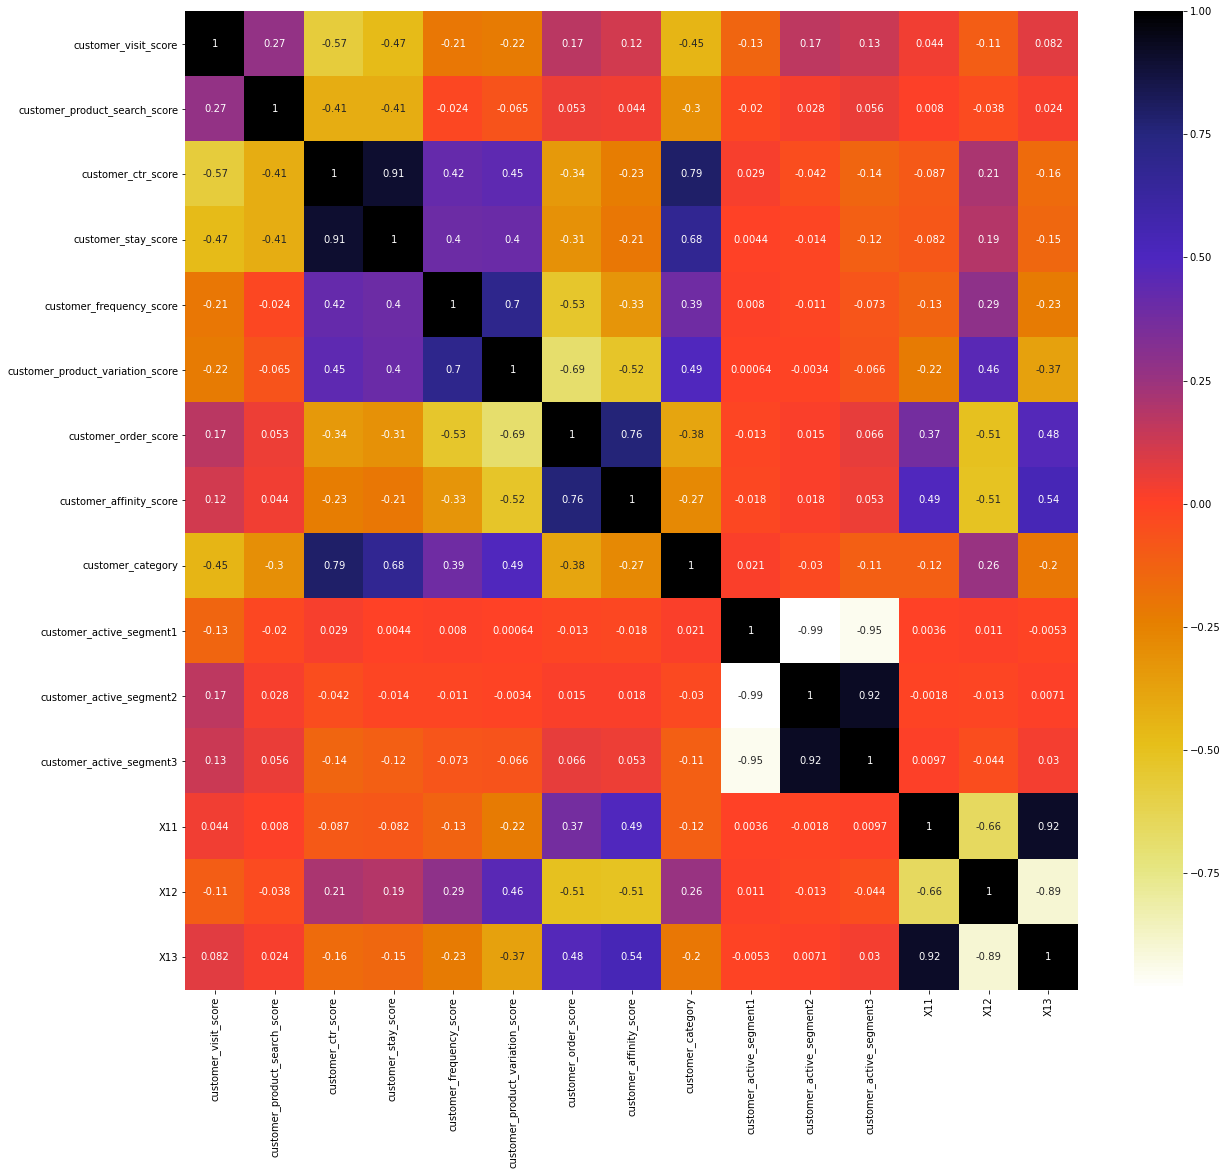

In [17]:
# Let's check the corrilation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,18))
cor = customer_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(customer_train, 0.95) # setting corrilation threshold as 70 %
len(set(corr_features))

2

In [210]:
#corr_features.remove('customer_category')
corr_features

{'X12', 'X13', 'customer_active_segment3'}

In [9]:
customer_train=customer_train.drop(corr_features,axis=1)
customer_test=customer_test.drop(corr_features,axis=1)

In [ ]:
# I am not removing these corr_features because my model accurecy is more when I am keeping these features

In [20]:
print(customer_train.shape,customer_test.shape)

(10738, 15) (7160, 14)


In [11]:
# Lets do some Feature Engineering 

# We need to determine the feature_importance  using InMemoryModel

In [21]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
X=customer_train.drop('customer_category',axis=1)
y=customer_train['customer_category']

In [204]:
%%time

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
#xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,objective='binary:logistic', random_state=42)
LR = LogisticRegression(**{'C': 91, 'class_weight': None, 'penalty': 'l2'})

LR.fit(X, y)

Wall time: 465 ms


LogisticRegression(C=91)

[14/14] features ████████████████████ Time elapsed: 1 seconds

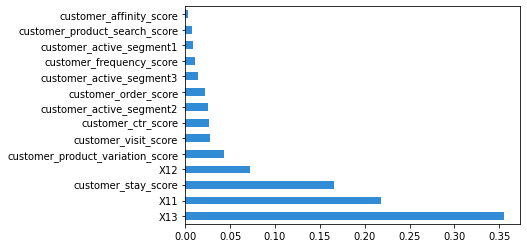

In [205]:
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(LR.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [ ]:
# Anonymized feature based on loyalty of the customer - having the highest contribution towards the prediction
#     - Hence we need to identify what is these features,
# customer_stay_score is also contributing more towards the customer_category
# customer visit score contributing towards customer_category 1 
# customer_active_segment is also hving significant contribution towards the result than rest of the features

In [ ]:
# Lets check which all are the features contributing towards each target classes (1,0)

In [123]:
LR.classes_

array([0, 1], dtype=int64)

In [206]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
#from skater.util.dataops import show_in_notebook
exp = LimeTabularExplainer(X.values, 
                           feature_names=X.columns, 
                           discretize_continuous=True, 
                           class_names=['Y_0', 'Y_1'])
exp.explain_instance(X.iloc[10].values, LR.predict_proba).show_in_notebook()

In [ ]:
# Now we got a good picture about the feature contributions towards eachclass
# We have an inbalanced class, most of the target values are belongs to class 0
# Very few features like X13,customer_product_variation_score,customer_active_segment are contributing towards class 1
# rest of all features are contributing towards class 0
# Features we have created using categeorical embedding are really usefull for predicting customer_category 

In [ ]:
# Lets build some partial dependence plots to investigate further

[6/6] grid cells ████████████████████ Time elapsed: 6 seconds

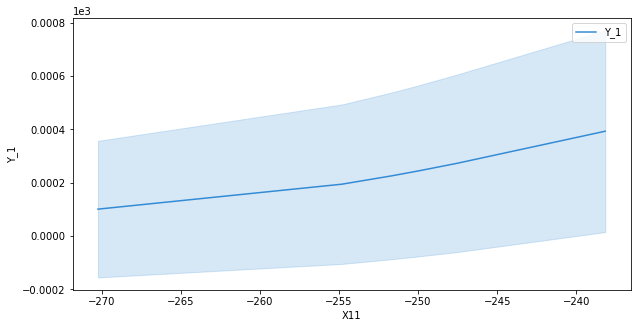

In [103]:
pyint_model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X11'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))


In [ ]:
# As X11 incresing Y is also incresing

[6/6] grid cells ████████████████████ Time elapsed: 5 seconds

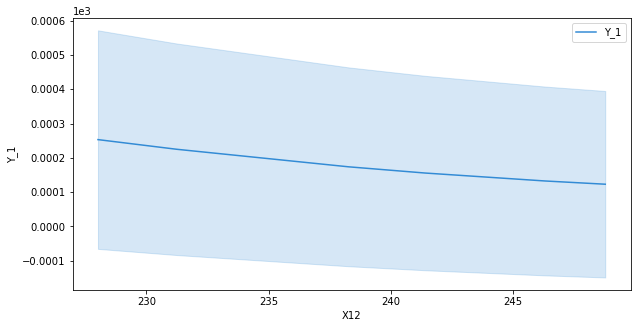

In [104]:
pyint_model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X12'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

In [ ]:
# as X12 decresing Y is also decresing, 

[6/6] grid cells ████████████████████ Time elapsed: 6 seconds

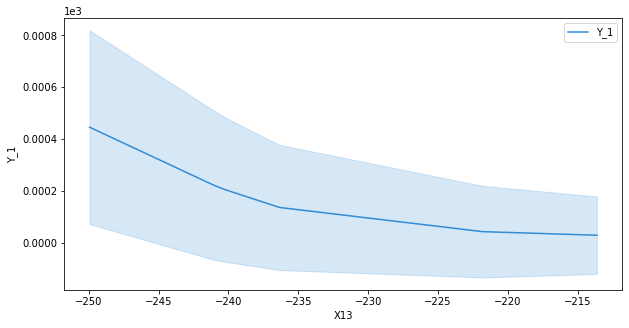

In [105]:
pyint_model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X13'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

In [ ]:
# As we expected,Anonymized feature based on loyalty of the customer (X11,X13)- having the highest contribution- 
#      towards the prediction

[30/30] grid cells ████████████████████ Time elapsed: 6 seconds

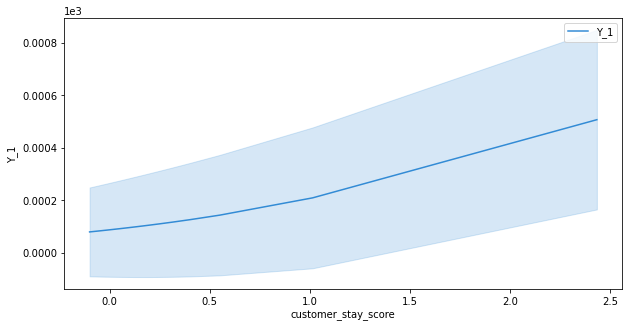

In [106]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['customer_stay_score'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

In [ ]:
# We can observe as customer stay more time in the website, more chances chances to belongs to customer catagory 1

[100/100] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

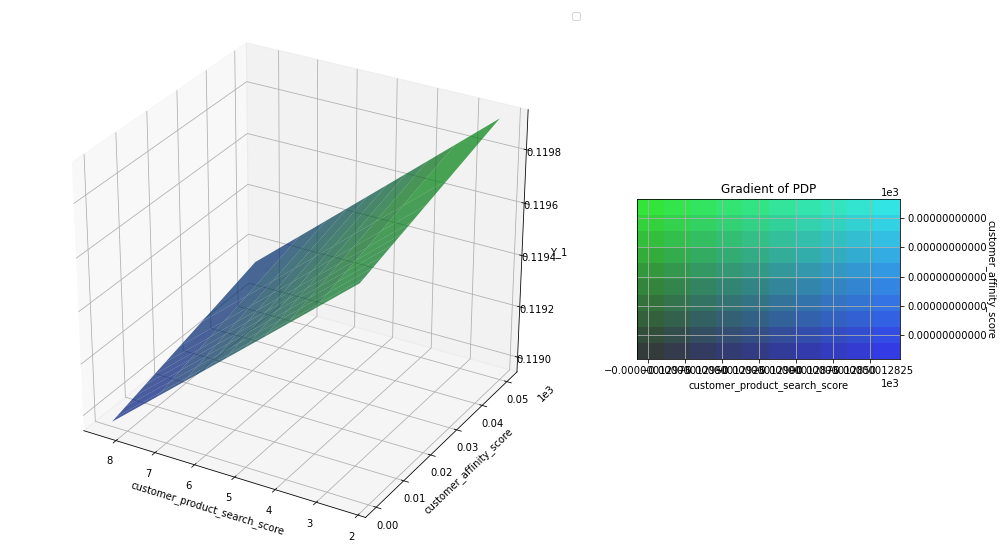

In [137]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([( 'customer_product_search_score','customer_affinity_score')], model, 
                                                       grid_resolution=10)

In [ ]:
# as customer_product_variation_score increses, more chances to belongs to catagory 1
# customer_affinity_score remains same

[36/36] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

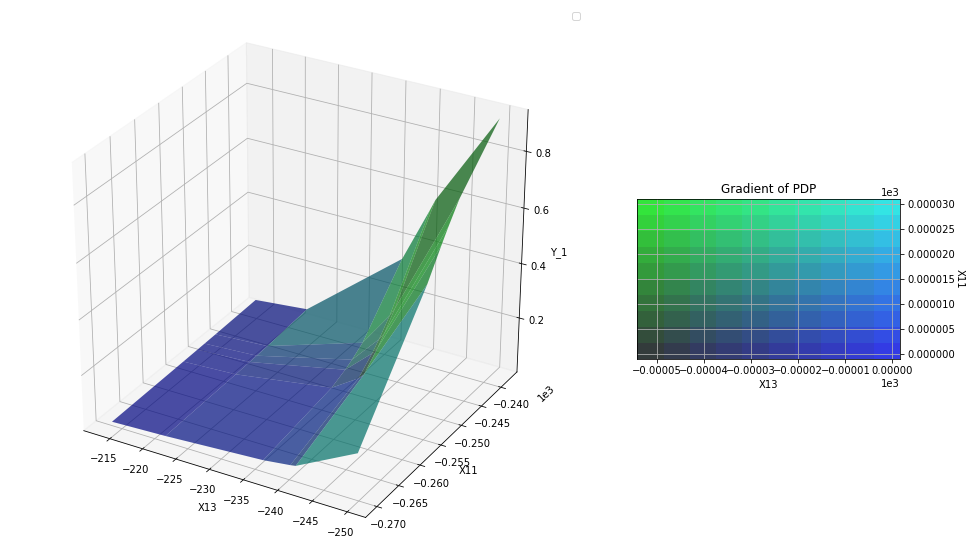

In [135]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('X13', 'X11')], model, 
                                                       grid_resolution=10)

In [ ]:
# as X11,X13 increses, customer_category also increses 

[100/100] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

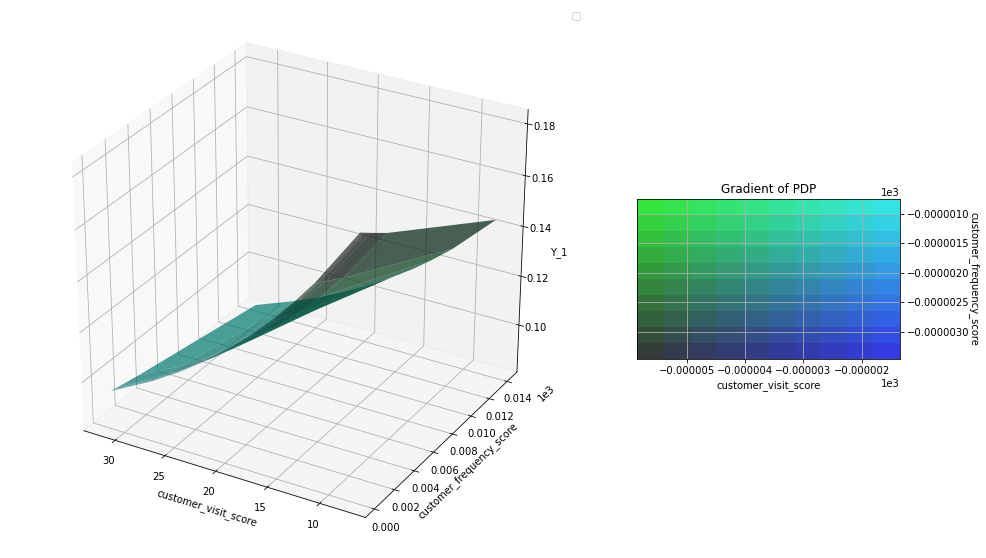

In [128]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_visit_score', 'customer_frequency_score')], model, 
                                                       grid_resolution=10)

In [ ]:
# As customer_visit_score and customer_frequency_score increses customer_category also decreses.

[100/100] grid cells ████████████████████ Time elapsed: 7 seconds

[[<Figure size 1152x720 with 2 Axes>,

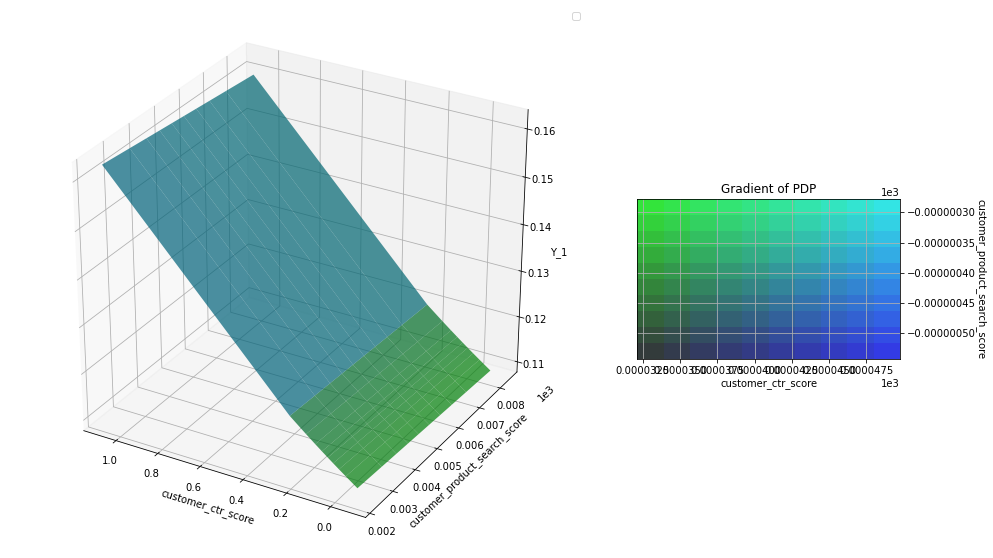

In [110]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_ctr_score', 'customer_product_search_score')], model, 
                                                       grid_resolution=10)

In [ ]:
# customer_ctr_score and customer_product_score increses, customer_category class 1 also increses

[36/36] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 2 Axes>,

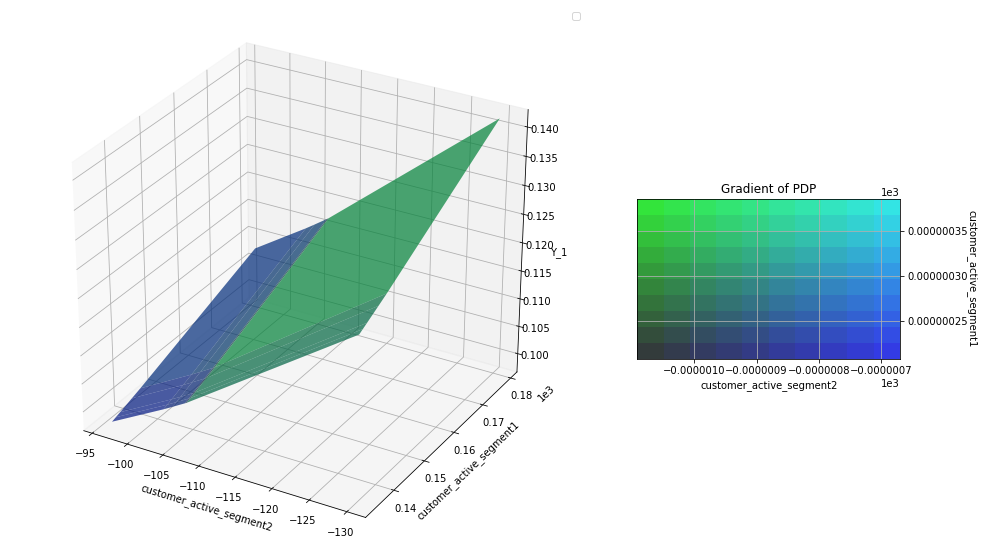

In [114]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([( 'customer_active_segment2','customer_active_segment1')], model, 
                                                       grid_resolution=10)

In [ ]:
# customer_active_segment1 increses, customer_catogary class 1 also increses
# as customer_active_segment2 increses, chances of customer_catogery class 1 decreses

[100/100] grid cells ████████████████████ Time elapsed: 7 seconds

[[<Figure size 1152x720 with 2 Axes>,

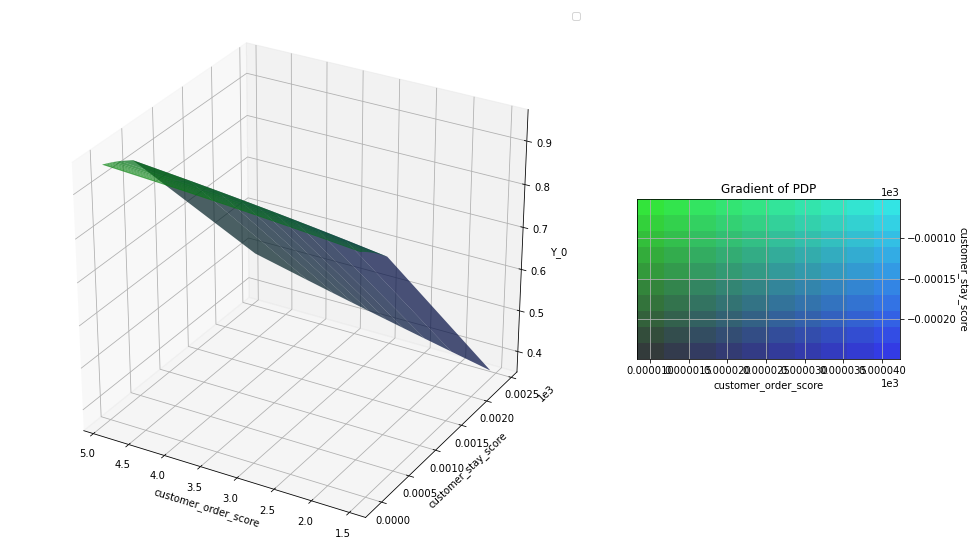

In [140]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('customer_order_score','customer_stay_score')], model, 
                                                       grid_resolution=10)

In [ ]:
# if customer_stay_score increses, chanses of getting customer_category 1 also increses 
# if customer order score increses chances of belonging to customer_category 1 decreses

[60/60] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

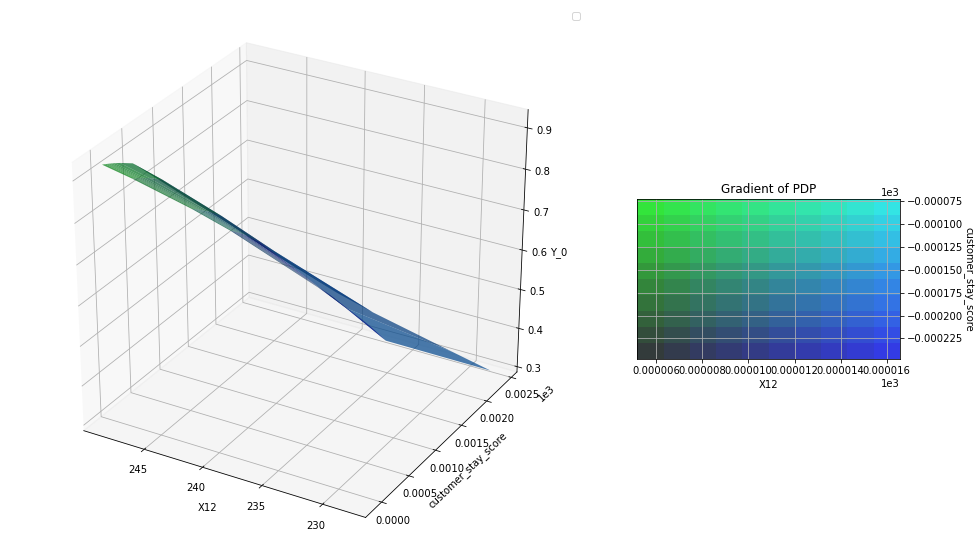

In [139]:
model = InMemoryModel(LR.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('X12','customer_stay_score')], model, 
                                                       grid_resolution=10)

In [ ]:
# As customer_stay_score increses chances of belonging to customer_category 0 decreses 
# but Anonymized feature based on loyalty of the customer (X12)- increses, chnces of belonging to customer category 0 also
#    incresing.

In [35]:
x_train.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment1',
       'customer_active_segment2', 'customer_active_segment3', 'X11', 'X12',
       'X13'],
      dtype='object')

In [ ]:
# Now tha data is ready for modeling, We need to split the data into train and test innorder to find the -
# accurecy of the model 

In [29]:
customer_train.reset_index(drop=True,inplace=True)
customer_test.reset_index(drop=True,inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
c_train,c_test=train_test_split(customer_train, test_size = 0.2,random_state=2)

In [32]:
X=customer_train.drop(['customer_category'],axis=1)
y=customer_train['customer_category']

In [33]:
x_train=c_train.drop(["customer_category"],1)
y_train=c_train["customer_category"]

x_test=c_test.drop(["customer_category"],1)
y_test=c_test["customer_category"]

In [34]:
print(x_train.shape,x_test.shape)

(8590, 14) (2148, 14)


In [35]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [36]:
# Below pipeline will tell us the best performing Machine learning Model on this data set

# 9 popular machine learning algorithms I have included in this pipeline
# K-Fold validation with 5 Folds, scoring method -'roc-auc'

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [148]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LogisticRegression())])))
#pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
#pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', MinMaxScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', MinMaxScaler()),('XGB', XGBClassifier())])))
pipelines.append(('ScaledNN', Pipeline([('Scaler', MinMaxScaler()),('NN', MLPClassifier())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVC', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, random_state=5)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, n_jobs=-1,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.963624 (0.008649)
ScaledDT: 0.899577 (0.005018)
ScaledRF: 0.967857 (0.004556)
ScaledET: 0.968709 (0.005599)
ScaledGBM: 0.973589 (0.005591)
ScaledXGB: 0.972952 (0.004275)
ScaledNN: 0.972663 (0.003590)
ScaledSVR: 0.966089 (0.002809)
ScaledKNN: 0.922230 (0.007572)


In [ ]:
    # After several Iterations I have concluded that Logistic Regression is performing well on the Test data 

In [ ]:
# I am using GrigSearchCV with 5 cross validations with some hyper parameters.

In [ ]:
# Logistic Riggression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [150]:
params={'class_weight':['balanced',None],
       'penalty':['l1','l2'],
       'C':np.linspace(0.00,1000,100)
                      }

In [151]:
model=LogisticRegression(fit_intercept=True)

In [152]:
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring='roc_auc',n_jobs=-1,verbose=1)


import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [153]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([   0.        ,   10.1010101 ,   20.2020202 ,   30.3030303 ,
         40.4040404 ,   50.50505051,   60.60606061,   70.70707071,
         80.80808081,   90.90909091,  101.01010101,  111.11111111,
        121.21212121,  131.31313131,  141.41414141,  151.51515152,
        161.61616162,  171.71717172,  181.81818182,  191.91919192,
        202.02020202,  212.12121212,  222.2...
        767.67676768,  777.77777778,  787.87878788,  797.97979798,
        808.08080808,  818.18181818,  828.28282828,  838.38383838,
        848.48484848,  858.58585859,  868.68686869,  878.78787879,
        888.88888889,  898.98989899,  909.09090909,  919.19191919,
        929.29292929,  939.39393939,  949.49494949,  959.5959596 ,
        969.6969697 ,  979.7979798 ,  989.8989899 , 1000.        ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
          

In [154]:
logr=grid_search.best_estimator_

In [155]:
# Below report function will give the top ranks for parameters, will help to find the best score and its parameters 

In [156]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [157]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.958134(std:0.00598)
parameters: {'C': 575.7575757575758, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.958080(std:0.00644)
parameters: {'C': 636.3636363636364, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.957798(std:0.00426)
parameters: {'C': 606.060606060606, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.957496(std:0.00546)
parameters: {'C': 565.6565656565656, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.957480(std:0.00684)
parameters: {'C': 454.5454545454545, 'class_weight': 'balanced', 'penalty': 'l2'}



In [158]:
logr.fit(X,y)

LogisticRegression(C=575.7575757575758, class_weight='balanced')

In [159]:
list(zip(x_train.columns,logr.coef_[0]))

[('customer_visit_score', -0.06850696489105995),
 ('customer_product_search_score', 0.27299647885320216),
 ('customer_ctr_score', 2.161704958407395),
 ('customer_stay_score', 3.490861506777183),
 ('customer_frequency_score', -0.13387380507538751),
 ('customer_product_variation_score', 0.4722086939249385),
 ('customer_order_score', -0.7210928790808633),
 ('customer_affinity_score', -0.008575993444543975),
 ('customer_active_segment1', -0.1238112395004026),
 ('customer_active_segment2', -0.19781647239992398),
 ('customer_active_segment3', -0.00331458457199074),
 ('X11', -0.031494476815144584),
 ('X12', -0.006682408512900961),
 ('X13', 0.056447124834319344)]

In [160]:
x_train.shape

(8590, 14)

In [161]:
p=logr.predict(x_test)

In [162]:
from sklearn.metrics import roc_auc_score

In [163]:
roc_auc_score(y_test,p)

0.9240870117497617

In [164]:
prob_score=pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

In [165]:
cutoffs=np.linspace(0,1,100)

In [56]:
KS_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [57]:
# Performance on test data
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(KS_cutoff)]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

confusion matrix :
 
  predicted     0    1
real                
0          1771  109
1            27  241


In [58]:
# Accuracy of test
(TP+TN)/(P+N)

0.9366852886405959

In [59]:
# Sensitivity on test
TP/P

0.8992537313432836

In [60]:
#Specificity on test
TN/N

0.9420212765957446

In [61]:
cutoffs=np.linspace(0.010,0.99,100)
def Fbeta_perf(beta,cutoffs,y_train,prob_score):
    FB_cut=[]
    for cutoff in cutoffs:
        predicted=pd.Series([0]*len(y_train))
        predicted[prob_score>cutoff]=1
        df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        
        
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        FB_cut.append(FB)

    cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])

    FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]

    prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

    predicted_test=pd.Series([0]*len(y_test))
    predicted_test[prob_score_test>float(FB_cutoff)]=1

    df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

    k=pd.crosstab(df_test['real'],df_test["predicted"])
#     print('confusion matrix :\n \n ',k)
    TN=k.iloc[0,0]
    TP=k.iloc[1,1]
    FP=k.iloc[0,1]
    FN=k.iloc[1,0]
    P=TP+FN
    N=TN+FP
    print('For beta :',beta)
    print('Accuracy is :',(TP+TN)/(P+N))
    print('Sensitivity is :',(TP/P))
    print('Specificity is :',(TN/N))
    print('\n \n \n')

In [62]:
Fbeta_perf(0.5,cutoffs,y_train,prob_score)
Fbeta_perf(1,cutoffs,y_train,prob_score)
Fbeta_perf(2,cutoffs,y_train,prob_score)

For beta : 0.5
Accuracy is : 0.9511173184357542
Sensitivity is : 0.6343283582089553
Specificity is : 0.9962765957446809

 
 

For beta : 1
Accuracy is : 0.9553072625698324
Sensitivity is : 0.7276119402985075
Specificity is : 0.9877659574468085

 
 

For beta : 2
Accuracy is : 0.9506517690875232
Sensitivity is : 0.8694029850746269
Specificity is : 0.9622340425531914

 
 



In [166]:
roc_auc_score(y_test,p)

0.9240870117497617

In [167]:
# I  got an acuuracy of 92 in train data lets check it in test data

In [168]:
p=logr.predict(customer_test)

In [169]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\test.csv")

In [170]:
temp.shape

(7160, 11)

In [171]:
submission=pd.DataFrame({
    'customer_id': temp['customer_id'],
    'customer_category':p
})

In [172]:
submission.to_csv('Amazone.csv', index=False)

In [173]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,1


In [174]:
submission['customer_category'].value_counts()

0    3644
1    3516
Name: customer_category, dtype: int64

In [ ]:
# I got the score on test data 97.55

In [175]:
# Lets do some Hyper parameter tuning to imporove the scores
# Here I am using Bayasian Hyper patameter tuning with hyperopt

In [176]:
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

In [177]:
def acc_model(params):
    XGB = LogisticRegression(**params)
    return cross_val_score(XGB, X, y).mean()

In [178]:
param_space={
    'class_weight':hp.choice('class_weight', ['balanced',None]),
       'penalty':hp.choice('penalty', ['l1','l2']),
       'C':hp.choice('C', np.linspace(0.01,1000,100))
}

In [179]:
best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

In [180]:
trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                             
0                                                     
{'C': 777.7800000000001, 'class_weight': 'balanced', 'penalty': 'l1'}
new best:                                                        
0                                                                
{'C': 353.5418181818182, 'class_weight': None, 'penalty': 'l1'}  
new best:                                                        
0                                                                
{'C': 949.4954545454545, 'class_weight': None, 'penalty': 'l1'}  
new best:                                                        
0.9263315318503407                                               
{'C': 898.9909090909091, 'class_weight': 'balanced', 'penalty': 'l2'}
new best:                                                        
0.9589302643071316                                               
{'C': 10.110909090909091, 'class_weight': None, 'penalty': 'l2'} 
new best:               

In [182]:
# The best score I got from the Bayasian Hyper parameter tuning is
{'C': 91, 'class_weight': 1, 'penalty': 1}

{'C': 91, 'class_weight': 1, 'penalty': 1}

In [ ]:
# Lets do the K-fold cross validation with the best score and also incresed the number of folds to 30 and Iterations 10

In [181]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
LR_model = LogisticRegression(**{'C': 91, 'class_weight': None, 'penalty': 'l2'})
# evaluate the model
cv = RepeatedKFold(n_splits=30, n_repeats=10)
n_scores = cross_val_score(LR_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise',verbose=1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.2s


MAE: 0.949 (0.026)


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.1s finished


In [183]:
LR_model.fit(X,y)

LogisticRegression(C=91)

In [184]:
p=LR_model.predict(x_test)

In [185]:
roc_auc_score(y_test,p)

0.8579469672912035

In [186]:
p=LR_model.predict(customer_test)

In [187]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\test.csv")

In [188]:
temp.shape

(7160, 11)

In [189]:
submission=pd.DataFrame({
    'customer_id': temp['customer_id'],
    'customer_category':p
})

In [190]:
submission.to_csv('Amazone.csv', index=False)

In [191]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [192]:
submission['customer_category'].value_counts()

0    6899
1     261
Name: customer_category, dtype: int64

In [ ]:
# Now I got the best score in test data 98.44

In [ ]:
# Pros and cons of this model

#Pros-:

#   Since this model is giving an accurecy of 98.44 we can tell as one of the best model that we can build on top of 
#     this data
#   Since this model is more accurate, we can use this model for building recomendation Engine for further application 
#     devolopments
#   Since we have used Logistic Regression algorithm for model building we are estimating Y=mx+c
#      Y = predicted values for each customer data
#      m,c = We have evaluated through the Hyper parameter tuning  ({'C': 91, 'class_weight': None, 'penalty': 'l2'})
#      x = Features that we have finalised for model building
#            Index(['customer_visit_score', 'customer_product_search_score',
#       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
#      'customer_product_variation_score', 'customer_order_score',
#      'customer_affinity_score', 'customer_active_segment1',
#      'customer_active_segment2', 'customer_active_segment3', 'X11', 'X12',
#      'X13']

# Cons-: 

#      Since we have evaluated the accurecy on 30% of the test data we cannot finalize the model accurecy
#      Since data set is very small, we are not sure how the model will perform when large data set comes
#      

In [207]:
X.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment1',
       'customer_active_segment2', 'customer_active_segment3', 'X11', 'X12',
       'X13'],
      dtype='object')

In [ ]:
# I am trying with other models also 

In [193]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
LR_model = LogisticRegression()
# evaluate the model
cv = RepeatedKFold(n_splits=30, n_repeats=10)
n_scores = cross_val_score(LR_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise',verbose=1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s


MAE: 0.949 (0.025)


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.2s finished


In [194]:
LR_model.fit(X,y)

LogisticRegression()

In [195]:
p=LR_model.predict(x_test)

In [196]:
roc_auc_score(y_test,p)

0.8504842807240395

In [197]:
p=LR_model.predict(customer_test)

In [198]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\test.csv")

In [199]:
temp.shape

(7160, 11)

In [200]:
submission=pd.DataFrame({
    'customer_id': temp['customer_id'],
    'customer_category':p
})

In [201]:
submission.to_csv('Amazone.csv', index=False)

In [202]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [203]:
submission['customer_category'].value_counts()

0    6968
1     192
Name: customer_category, dtype: int64

In [ ]:
# I got a score of 95

In [ ]:
# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [38]:
param_dist={'n_estimators':[i for i in range (100,5000,300)],
             'max_features':[i for i in range (2,7,1)],
             'bootstrap':[True,False],
        'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[i for i in range (2,100,5)],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[i for i in range(2,100,3)] 
       }

In [76]:
clf=RandomForestClassifier(n_jobs=-1,verbose=1)

In [77]:
random_search=RandomizedSearchCV(clf,cv=5,
                                param_distributions=param_dist,
                                scoring='roc_auc',
                                n_iter=10
                                )

In [78]:
random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 993 out of 1000 | elapsed:   17.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elap

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 4900 out of 4900 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | e

[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   22.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   20.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.2s f

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    9.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    8.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s


KeyboardInterrupt: 

In [81]:
rf=random_search.best_estimator_

In [38]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [83]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.971950(std:0.00503)
parameters: {'n_estimators': 2800, 'min_samples_split': 95, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 57, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.971602(std:0.00465)
parameters: {'n_estimators': 1600, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_features': 8, 'max_depth': 92, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.970715(std:0.00459)
parameters: {'n_estimators': 3100, 'min_samples_split': 59, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 82, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.970256(std:0.00528)
parameters: {'n_estimators': 2500, 'min_samples_split': 62, 'min_samples_leaf': 10, 'max_features': 10, 'max_depth': 37, 'criterion': 'gini', 'class_weight': None, 'bootstrap':

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
predict=rf.predict(x_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 2800 out of 2800 | elapsed:    3.1s finished


In [86]:
roc_auc_score(y_train,predict)

0.945100429356727

In [92]:
p=rf.predict(customer_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 2800 out of 2800 | elapsed:    3.1s finished


In [93]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\test.csv")

In [101]:
temp.shape

(7160, 11)

In [95]:
submission=pd.DataFrame({
    'customer_id': temp['customer_id'],
    'customer_category':p
})

In [98]:
submission.to_csv('Amazone.csv', index=False)

In [99]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,1
4,csid_10743,0


In [ ]:
# got score 91 for this submission

In [ ]:
# Extra Tree Classifire

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

In [62]:
param_dist={
        'n_estimators': range(100,5000,200),
        'max_features': range(2,8,1),
        'min_samples_leaf': range(2,50,3),
        'min_samples_split': range(2,50,3),
    }

In [63]:
ET_clf=ExtraTreesClassifier()

In [87]:
random_search=RandomizedSearchCV(ET_clf,cv=10,
                                param_distributions=param_dist,
                                scoring='roc_auc',
                                n_iter=10,n_jobs=-1,verbose=1
                                )

In [ ]:
random_search.fit(x_train,y_train)

In [66]:
et=random_search.best_estimator_

In [67]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.970653(std:0.00875)
parameters: {'n_estimators': 3900, 'min_samples_split': 38, 'min_samples_leaf': 14, 'max_features': 5}

Model with rank: 2
Mean validation score: 0.970537(std:0.00873)
parameters: {'n_estimators': 4300, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': 5}

Model with rank: 3
Mean validation score: 0.969971(std:0.00853)
parameters: {'n_estimators': 3500, 'min_samples_split': 38, 'min_samples_leaf': 35, 'max_features': 6}

Model with rank: 4
Mean validation score: 0.967960(std:0.00849)
parameters: {'n_estimators': 2100, 'min_samples_split': 38, 'min_samples_leaf': 47, 'max_features': 5}

Model with rank: 5
Mean validation score: 0.966250(std:0.00848)
parameters: {'n_estimators': 700, 'min_samples_split': 26, 'min_samples_leaf': 41, 'max_features': 4}



In [42]:
from sklearn.metrics import roc_auc_score

In [71]:
predict=et.predict(x_test)

In [72]:
roc_auc_score(y_test,predict)

0.9037908859955541

In [73]:
p=et.predict(customer_test)

In [74]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\test.csv")

In [75]:
temp.shape

(7160, 11)

In [76]:
submission=pd.DataFrame({
    'customer_id': temp['customer_id'],
    'customer_category':p
})

In [77]:
submission.to_csv('Amazone.csv', index=False)

In [78]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [79]:
submission['customer_category'].value_counts()

0    6856
1     304
Name: customer_category, dtype: int64

In [ ]:
# got a score of 94 in Test data

In [ ]:
# XGBClassifier

In [80]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [81]:
param_dist={
                'learning_rate':[0.01,0.05,0.1,0.3,0.5],
                'gamma':[i/10.0 for i in range(0,5)],
                'max_depth':[i for i in range(1,20)],
                'min_child_weight':[i for i in range(1,10)],
                'max_delta_step':[i for i in range(1,10)],
                'subsample':[i/10.0 for i in range(5,10)],
                'colsample_bytree':[i/10.0 for i in range(5,10)],
                'colsample_bylevel':[i/10.0 for i in range(5,10)],
                'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                'scale_pos_weight':[i for i in range(1,25)],
                'n_estimators':[i for i in range(100,5000,100)]
            }

In [82]:
XGB_clf=XGBClassifier()

In [85]:
random_search=RandomizedSearchCV(XGB_clf,n_jobs=-1,verbose=1,cv=5,n_iter=5,scoring='roc_auc',
                                 param_distributions=param_dist)

In [ ]:
random_search.fit(X,y)

In [ ]:
xgb=random_search.best_estimator_

In [71]:
predict=xgb.predict(x_test)

In [72]:
roc_auc_score(y_test,predict)

0.9037908859955541

In [73]:
p=xgb.predict(customer_test)

In [74]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Amazon\test.csv")

In [75]:
temp.shape

(7160, 11)

In [76]:
submission=pd.DataFrame({
    'customer_id': temp['customer_id'],
    'customer_category':p
})

In [77]:
submission.to_csv('Amazone.csv', index=False)

In [78]:
submission.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [79]:
submission['customer_category'].value_counts()

0    6856
1     304
Name: customer_category, dtype: int64

In [ ]:
# got a score of 95 in Test data